使用随机数种子: 42


/home/qiwei/.conda/envs/omniscene/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/qiwei/.conda/envs/omniscene/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23450 (\N{CJK UNIFIED IDEOGRAPH-5B9A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/qiwei/.conda/envs/omniscene/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


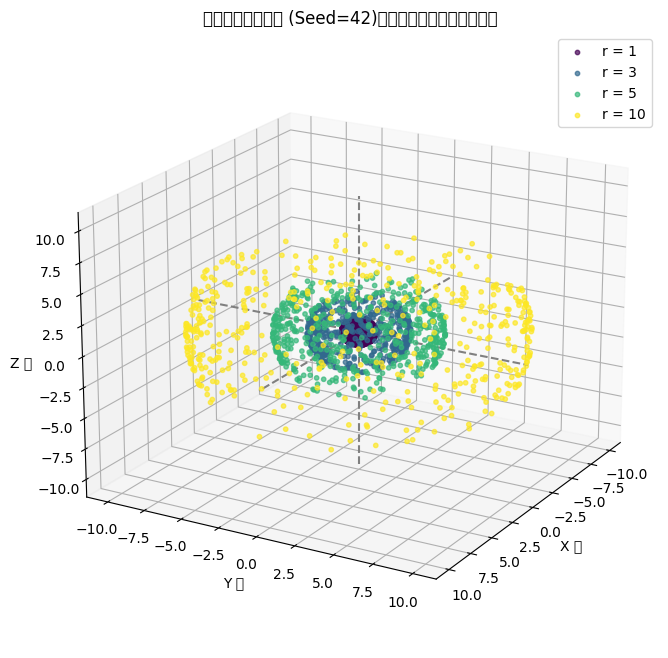

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import beta

# --- 设置随机数种子 ---
# 使用一个固定的整数作为种子。只要种子不变，
# 每次运行生成的 "随机" 数序列就是相同的。
SEED = 42 # 你可以选择任何整数
np.random.seed(SEED)
print(f"使用随机数种子: {SEED}") # 打印种子以确认

# --- 1. 定义 p(r) 函数 ---
# (与之前相同)
def concentration_parameter(r):
    """计算 Beta 分布的参数 p，使其随半径 r 增大"""
    return max(1.0, r)

# --- 2. 实现采样函数 ---
# (函数本身无需修改，因为它依赖于 NumPy 的全局 RNG 状态)
def sample_concentrating_sphere(r, n_samples):
    """
    在半径为 r 的球面上采样 n_samples 个点，
    点随着 r 增大越来越靠近赤道。

    Args:
        r (float): 球的半径。
        n_samples (int): 要采样的点的数量。

    Returns:
        tuple: (x, y, z) 笛卡尔坐标的 NumPy 数组。
    """
    if r <= 0:
        return np.zeros((n_samples,)), np.zeros((n_samples,)), np.zeros((n_samples,))

    p = concentration_parameter(r)

    # --- 采样极角 theta ---
    # 1. 从 Beta(p, p) 分布采样 x in [0, 1]
    #    现在会使用已设置种子的全局 RNG
    x_beta = beta(p, p).rvs(size=n_samples)

    # 2. 将 x 转换回 z = cos(theta) in [-1, 1]
    z = 2 * x_beta - 1

    # 3. 计算 theta = arccos(z) in [0, pi]
    theta = np.arccos(z) # arccos 是确定性函数，不需要种子

    # --- 采样方位角 phi ---
    # 在 [0, 2*pi) 上均匀采样
    # 现在会使用已设置种子的全局 RNG
    phi = 2 * np.pi * np.random.uniform(0, 1, size=n_samples)

    # --- 转换为笛卡尔坐标 ---
    # 这些计算也是确定性的
    x_cart = r * np.sin(theta) * np.cos(phi)
    y_cart = r * np.sin(theta) * np.sin(phi)
    z_cart = r * z

    return x_cart, y_cart, z_cart

# --- 3. 设置可视化参数 ---
# (与之前相同)
radii_to_visualize = [1, 3, 5, 10]
n_points_per_radius = 500
colors = plt.cm.viridis(np.linspace(0, 1, len(radii_to_visualize)))

# --- 4. 生成数据并绘图 ---
# (与之前相同)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制参考坐标轴
ax.plot([-radii_to_visualize[-1]*1.1, radii_to_visualize[-1]*1.1], [0,0], [0,0], color='gray', linestyle='--')
ax.plot([0,0], [-radii_to_visualize[-1]*1.1, radii_to_visualize[-1]*1.1], [0,0], color='gray', linestyle='--')
ax.plot([0,0], [0,0], [-radii_to_visualize[-1]*1.1, radii_to_visualize[-1]*1.1], color='gray', linestyle='--')


for i, r in enumerate(radii_to_visualize):
    x_coords, y_coords, z_coords = sample_concentrating_sphere(r, n_points_per_radius)
    ax.scatter(x_coords, y_coords, z_coords,
               label=f'r = {r}',
               color=colors[i],
               s=10,
               alpha=0.7)

# --- 美化图形 ---
# (与之前相同)
ax.set_title(f'球坐标确定性采样 (Seed={SEED})：点随半径增大向赤道集中')
ax.set_xlabel('X 轴')
ax.set_ylabel('Y 轴')
ax.set_zlabel('Z 轴')
max_r = max(radii_to_visualize)
ax.set_xlim([-max_r * 1.1, max_r * 1.1])
ax.set_ylim([-max_r * 1.1, max_r * 1.1])
ax.set_zlim([-max_r * 1.1, max_r * 1.1])
ax.legend()
ax.view_init(elev=20., azim=30)
plt.show()

In [11]:
import numpy as np
import torch # 使用 PyTorch 以便与示例函数风格保持一致

# --- 假设你已经运行了之前的采样代码 ---
# SEED = 42
# np.random.seed(SEED)
# radii_to_visualize = [1, 3, 5, 10]
# n_points_per_radius = 500
# all_x, all_y, all_z = [], [], []
# for r in radii_to_visualize:
#     x, y, z = sample_concentrating_sphere(r, n_points_per_radius)
#     all_x.append(x)
#     all_y.append(y)
#     all_z.append(z)
# x_coords = np.concatenate(all_x)
# y_coords = np.concatenate(all_y)
# z_coords = np.concatenate(all_z)
# N = len(x_coords) # 总点数

# --- 示例：生成一些简单的球坐标点 ---
SEED = 42
np.random.seed(SEED)
r_example = 5.0
n_points_example = 1000
x_coords, y_coords, z_coords = sample_concentrating_sphere(r_example, n_points_example)
print(f"生成的 3D 点数量 N = {len(x_coords)}")

# --- 定义三平面投影函数 ---
def project_to_normalized_triplane(x, y, z, bounds_min, bounds_max):
    """
    将 3D 点投影到三个正交平面 (XY, YZ, XZ) 并归一化坐标到 [0, 1]。

    Args:
        x (np.array): N 个点的 X 坐标。
        y (np.array): N 个点的 Y 坐标。
        z (np.array): N 个点的 Z 坐标。
        bounds_min (tuple/list): (xmin, ymin, zmin) 坐标范围的最小值。
        bounds_max (tuple/list): (xmax, ymax, zmax) 坐标范围的最大值。

    Returns:
        torch.Tensor: 形状为 (N, 3, 2) 的张量。
                      第1维是点索引。
                      第2维是平面索引 (0: XY, 1: YZ, 2: XZ)。
                      第3维是该平面上的归一化 2D 坐标。
    """
    xmin, ymin, zmin = bounds_min
    xmax, ymax, zmax = bounds_max

    # 检查分母是否为零
    range_x = xmax - xmin
    range_y = ymax - ymin
    range_z = zmax - zmin
    if range_x <= 0 or range_y <= 0 or range_z <= 0:
        raise ValueError("Bounding box dimensions must be positive.")

    # 归一化坐标到 [0, 1]
    xn = (x - xmin) / range_x
    yn = (y - ymin) / range_y
    zn = (z - zmin) / range_z

    # 将 NumPy 数组转换为 PyTorch 张量
    xn_t = torch.from_numpy(xn).float()
    yn_t = torch.from_numpy(yn).float()
    zn_t = torch.from_numpy(zn).float()

    # 创建三个平面的投影坐标 (N, 2)
    # Plane 0 (XY): (x_normalized, y_normalized)
    xy_proj = torch.stack([xn_t, yn_t], dim=-1)
    # Plane 1 (YZ): (y_normalized, z_normalized)
    yz_proj = torch.stack([yn_t, zn_t], dim=-1)
    # Plane 2 (XZ): (x_normalized, z_normalized)
    xz_proj = torch.stack([xn_t, zn_t], dim=-1)

    # 将三个平面的投影堆叠起来，形状变为 (N, 3, 2)
    triplane_coords = torch.stack([xy_proj, yz_proj, xz_proj], dim=1)

    return triplane_coords

# --- 使用函数 ---

# 1. 定义坐标范围
# 假设我们的点都在以原点为中心，边长为 2*max_r 的立方体内
# 如果你合并了多个半径的点，用最大的半径
max_abs_coord = r_example # 或者 max(radii_to_visualize) 如果合并了点
bounds_min = (-max_abs_coord, -max_abs_coord, -max_abs_coord)
bounds_max = ( max_abs_coord,  max_abs_coord,  max_abs_coord)

# 2. 计算三平面投影坐标
triplane_representation = project_to_normalized_triplane(
    x_coords, y_coords, z_coords, bounds_min, bounds_max
)

# --- 检查输出 ---
print(f"输出张量形状: {triplane_representation.shape}") # 应为 (N, 3, 2)
print("第一个点在三个平面上的归一化坐标:")
print(f"  XY平面 (x,y): {triplane_representation[0, 0, :].numpy()}")
print(f"  YZ平面 (y,z): {triplane_representation[0, 1, :].numpy()}")
print(f"  XZ平面 (x,z): {triplane_representation[0, 2, :].numpy()}")

# 验证归一化：检查所有坐标是否在 [0, 1] 范围内 (允许微小的浮点误差)
min_val = torch.min(triplane_representation)
max_val = torch.max(triplane_representation)
print(f"所有归一化坐标的最小值: {min_val.item()}")
print(f"所有归一化坐标的最大值: {max_val.item()}")
assert min_val >= -1e-6 and max_val <= 1.0 + 1e-6, "Normalization failed!"
print("归一化成功，所有坐标都在 [0, 1] 范围内。")

生成的 3D 点数量 N = 1000
输出张量形状: torch.Size([1000, 3, 2])
第一个点在三个平面上的归一化坐标:
  XY平面 (x,y): [0.05503152 0.2833178 ]
  YZ平面 (y,z): [0.2833178 0.5710766]
  XZ平面 (x,z): [0.05503152 0.5710766 ]
所有归一化坐标的最小值: 0.00012029301433358341
所有归一化坐标的最大值: 0.9999769330024719
归一化成功，所有坐标都在 [0, 1] 范围内。
